In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, glob

In [41]:
folder = '../training_output/run02_2018-11-14/loss/*txt'
n_batch = 100

In [49]:
loss= []
multiplier = n_batch/100+1

for file in glob.glob(folder):
    with open(file, 'r') as myfile:
        text = myfile.read().split(" ")
        epoch = text[1][:-1]
        batch = text[3][:-1]
        idx = (int(epoch)*multiplier+int(batch)/n_batch)/(multiplier)
        train_loss = text[6][:-1]
        val_loss = text[9][:-1]
        loss.append([idx, train_loss, val_loss])

In [50]:
loss = sorted(loss, key = lambda x: x[0])
loss = np.array(loss, dtype=float)
# loss[-1,:]
loss = loss.transpose()

In [52]:
idx = loss[0]
train_loss = loss[1]
val_loss = loss[2]

(0, 6)

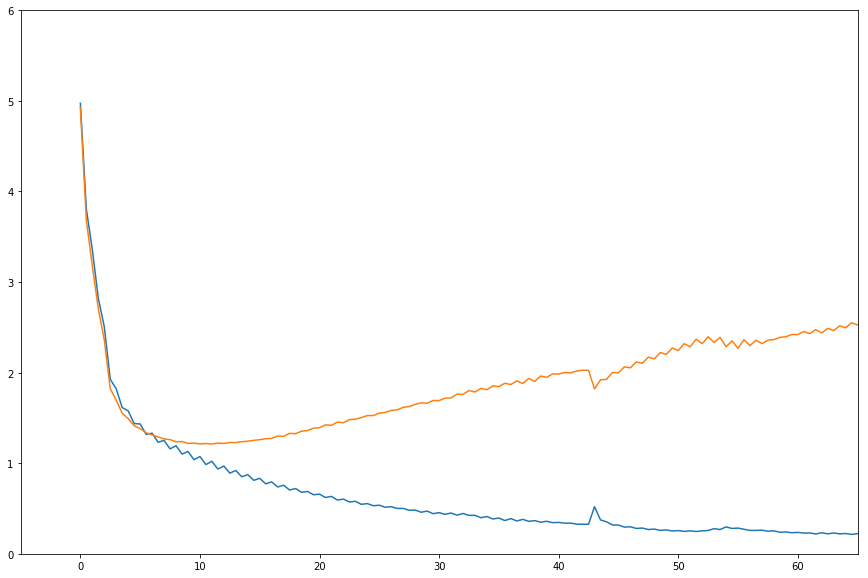

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
ax.plot(idx,train_loss)
ax.plot(idx,val_loss)
ax.set_xlim(-5,65)
ax.set_ylim(0,6)
# ax.axvline(x=10,color='red')
# fig.savefig("../images/run02_loss.png");